# Logistic Regression with L2 regularization

In [1]:
#Libraries Import
import json
import string
import numpy as np
import pandas as pd
from math import exp
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6
pd.set_option("Chained_Assignment",None)

In [2]:
#read dataframe
dataframe=pd.read_csv("amazon_baby_subset.csv")

In [3]:
import json
with open('important_words.json', 'r') as f: # Reads the list of most frequent words
    important_words = json.load(f)
important_words = [str(s) for s in important_words]

In [4]:
#replace null values with empty string
dataframe = dataframe.fillna({'review':''})

In [5]:
#remove punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator) 

dataframe["review_without_punctuation"] = dataframe['review'].apply(lambda x : remove_punctuation(x))
dataframe=dataframe[["name","review_without_punctuation","rating"]]

In [6]:
# For each word in important_words, we compute a count for the number of times the word occurs in the review.
for word in important_words:
    dataframe[word] = dataframe['review_without_punctuation'].apply(lambda s : s.split().count(word))

In [7]:
dataframe['sentiment'] = dataframe['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [8]:
def get_numpy_data(dataframe,features,label):
    dataframe['intercept'] = 1
    features = ['intercept'] + features
    feature_matrix = dataframe[features].values
    label_array=dataframe[label].values
    return(feature_matrix, label_array)

In [9]:
#train,validation data
with open('module-4-assignment-validation-idx.json') as validation_data_file:    
    validation_data_idx = json.load(validation_data_file)
with open('module-4-assignment-train-idx.json') as train_data_file:    
    train_data_idx = json.load(train_data_file)

train_data = dataframe.iloc[train_data_idx]
validation_data = dataframe.iloc[validation_data_idx]


In [10]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

In [11]:
'''
feature_matrix: N * D
coefficients: D * 1
score: N * 1

predictions: N * 1

produces probablistic estimate for P(y_i = +1 | x_i, w).
estimate ranges between 0 and 1.
'''

def predict_probability(feature_matrix, coefficients):
   
    score = np.dot(feature_matrix, coefficients) # N * 1
    predictions = 1.0/(1+np.exp(-score))
    return predictions

In [12]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    derivative = np.dot(np.transpose(errors), feature)

    if not feature_is_constant: 
        derivative -= 2 * l2_penalty * coefficient
        
    return derivative


# QUIZ Logistic Regression with L2 regularization


#### Question 1
In the function feature_derivative_with_L2, was the intercept term regularized?

__Ans__: No

#### Question 2
Does the term with L2 regularization increase or decrease the log likelihood ℓℓ(w)?

__Ans__: Decreases

In [13]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    lp = np.sum((np.transpose(np.array([indicator]))-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

In [14]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        
        predictions = predict_probability(feature_matrix, coefficients)
        indicator = (sentiment==+1)
        errors = np.transpose(np.array([indicator])) - predictions
        
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            
            coefficients[j] += step_size*derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

In [15]:
initial_coefficients = np.zeros((194,1))
step_size = 5e-6
max_iter = 501

In [16]:
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train , sentiment_train , initial_coefficients, step_size, 0, max_iter)

iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

In [17]:
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train , sentiment_train , initial_coefficients, step_size, 4, max_iter)

iteration   0: log likelihood of observed labels = -29179.39508175
iteration   1: log likelihood of observed labels = -29003.73417180
iteration   2: log likelihood of observed labels = -28834.71441858
iteration   3: log likelihood of observed labels = -28671.80345068
iteration   4: log likelihood of observed labels = -28514.58077957
iteration   5: log likelihood of observed labels = -28362.69830317
iteration   6: log likelihood of observed labels = -28215.85663259
iteration   7: log likelihood of observed labels = -28073.79071393
iteration   8: log likelihood of observed labels = -27936.26093762
iteration   9: log likelihood of observed labels = -27803.04751805
iteration  10: log likelihood of observed labels = -27673.94684207
iteration  11: log likelihood of observed labels = -27548.76901327
iteration  12: log likelihood of observed labels = -27427.33612958
iteration  13: log likelihood of observed labels = -27309.48101569
iteration  14: log likelihood of observed labels = -27195.0462

In [18]:
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train , sentiment_train , initial_coefficients, step_size, 10, max_iter)

iteration   0: log likelihood of observed labels = -29179.40062984
iteration   1: log likelihood of observed labels = -29003.76654163
iteration   2: log likelihood of observed labels = -28834.79322654
iteration   3: log likelihood of observed labels = -28671.94687528
iteration   4: log likelihood of observed labels = -28514.80571589
iteration   5: log likelihood of observed labels = -28363.02048079
iteration   6: log likelihood of observed labels = -28216.29071186
iteration   7: log likelihood of observed labels = -28074.35036891
iteration   8: log likelihood of observed labels = -27936.95892966
iteration   9: log likelihood of observed labels = -27803.89576265
iteration  10: log likelihood of observed labels = -27674.95647005
iteration  11: log likelihood of observed labels = -27549.95042714
iteration  12: log likelihood of observed labels = -27428.69905549
iteration  13: log likelihood of observed labels = -27311.03455140
iteration  14: log likelihood of observed labels = -27196.7989

In [19]:
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train , sentiment_train , initial_coefficients, step_size, 1e2, max_iter)

iteration   0: log likelihood of observed labels = -29179.48385120
iteration   1: log likelihood of observed labels = -29004.25177457
iteration   2: log likelihood of observed labels = -28835.97382190
iteration   3: log likelihood of observed labels = -28674.09410083
iteration   4: log likelihood of observed labels = -28518.17112932
iteration   5: log likelihood of observed labels = -28367.83774654
iteration   6: log likelihood of observed labels = -28222.77708939
iteration   7: log likelihood of observed labels = -28082.70799392
iteration   8: log likelihood of observed labels = -27947.37595368
iteration   9: log likelihood of observed labels = -27816.54738615
iteration  10: log likelihood of observed labels = -27690.00588850
iteration  11: log likelihood of observed labels = -27567.54970126
iteration  12: log likelihood of observed labels = -27448.98991327
iteration  13: log likelihood of observed labels = -27334.14912742
iteration  14: log likelihood of observed labels = -27222.8604

In [20]:
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train , sentiment_train , initial_coefficients, step_size, 1e3, max_iter)

iteration   0: log likelihood of observed labels = -29180.31606471
iteration   1: log likelihood of observed labels = -29009.07176112
iteration   2: log likelihood of observed labels = -28847.62378912
iteration   3: log likelihood of observed labels = -28695.14439397
iteration   4: log likelihood of observed labels = -28550.95060743
iteration   5: log likelihood of observed labels = -28414.45771129
iteration   6: log likelihood of observed labels = -28285.15124375
iteration   7: log likelihood of observed labels = -28162.56976044
iteration   8: log likelihood of observed labels = -28046.29387744
iteration   9: log likelihood of observed labels = -27935.93902900
iteration  10: log likelihood of observed labels = -27831.15045502
iteration  11: log likelihood of observed labels = -27731.59955260
iteration  12: log likelihood of observed labels = -27636.98108219
iteration  13: log likelihood of observed labels = -27547.01092670
iteration  14: log likelihood of observed labels = -27461.4242

In [21]:
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train , sentiment_train , initial_coefficients, step_size, 1e5, max_iter)

iteration   0: log likelihood of observed labels = -29271.85955115
iteration   1: log likelihood of observed labels = -29271.71006589
iteration   2: log likelihood of observed labels = -29271.65738833
iteration   3: log likelihood of observed labels = -29271.61189923
iteration   4: log likelihood of observed labels = -29271.57079975
iteration   5: log likelihood of observed labels = -29271.53358505
iteration   6: log likelihood of observed labels = -29271.49988440
iteration   7: log likelihood of observed labels = -29271.46936584
iteration   8: log likelihood of observed labels = -29271.44172890
iteration   9: log likelihood of observed labels = -29271.41670149
iteration  10: log likelihood of observed labels = -29271.39403722
iteration  11: log likelihood of observed labels = -29271.37351294
iteration  12: log likelihood of observed labels = -29271.35492661
iteration  13: log likelihood of observed labels = -29271.33809523
iteration  14: log likelihood of observed labels = -29271.3228

In [22]:
# Compare coefficients
table = pd.DataFrame({'word': ['(intercept)'] + important_words})
def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    return table

In [23]:
add_coefficients_to_table(coefficients_0_penalty, 'coefficients [L2=0]')
add_coefficients_to_table(coefficients_4_penalty, 'coefficients [L2=4]')
add_coefficients_to_table(coefficients_10_penalty, 'coefficients [L2=10]')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients [L2=1e2]')
add_coefficients_to_table(coefficients_1e3_penalty, 'coefficients [L2=1e3]')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients [L2=1e5]')

,word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2],coefficients [L2=1e3],coefficients [L2=1e5]
0,(intercept),-0.063742,-0.063143,-0.062256,-0.050438,0.000054,0.011362
1,baby,0.074073,0.073994,0.073877,0.072360,0.059752,0.001784
2,one,0.012753,0.012495,0.012115,0.007247,-0.008761,-0.001827
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
5,use,-0.000104,0.000163,0.000556,0.005481,0.017326,0.000418
6,would,-0.287021,-0.286027,-0.284564,-0.265993,-0.188662,-0.008127
7,like,-0.003384,-0.003442,-0.003527,-0.004635,-0.007043,-0.000827
8,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
9,little,0.524419,0.521385,0.516917,0.460235,0.251221,0.005941


#### Question 3
Which of the following words is not listed in either positive_words or negative_words?

__Ans__: Quality

In [24]:
#5 most positive words

positive_words=pd.DataFrame({'word': ['(intercept)'] + important_words,"coefficient":[x[0] for x in coefficients_0_penalty]})\
.sort_values("coefficient",ascending=False)\
.reset_index(drop=True)[:5]["word"].tolist()



pd.DataFrame({'word': ['(intercept)'] + important_words,"coefficient":[x[0] for x in coefficients_0_penalty]})\
.sort_values("coefficient",ascending=False)\
.reset_index(drop=True)[:5]



,word,coefficient
0,love,1.058554
1,loves,1.052484
2,easy,0.984559
3,perfect,0.835693
4,great,0.801625


In [25]:
#5 most negative words

negative_words=pd.DataFrame({'word': ['(intercept)'] + important_words,"coefficient":[x[0] for x in coefficients_0_penalty]})\
.sort_values("coefficient",ascending=False)\
.reset_index(drop=True)[-5:]["word"].tolist()


pd.DataFrame({'word': ['(intercept)'] + important_words,"coefficient":[x[0] for x in coefficients_0_penalty]})\
.sort_values("coefficient",ascending=False)\
.reset_index(drop=True)[-5:]

,word,coefficient
189,returned,-0.572707
190,waste,-0.617809
191,return,-0.742085
192,money,-0.768793
193,disappointed,-0.955437


#### Question 4
Questions 5 and 6 use the coefficient plot of the words in positive_words and negative_words.                       
(True/False) All coefficients consistently get smaller in size as the L2 penalty is increased.

__Ans__: True

In [26]:
table = pd.DataFrame(data=[coefficients_0_penalty.flatten(), coefficients_4_penalty.flatten(),
                coefficients_10_penalty.flatten(), coefficients_1e2_penalty.flatten(), \
                coefficients_1e3_penalty.flatten(), coefficients_1e5_penalty.flatten()], \
                index=[0, 4, 10, 100.0, 1000.0, 100000.0], \
                columns=['(intercept)'] + important_words)

In [27]:
def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    
    table_positive_words = table[positive_words] 
    table_negative_words = table[negative_words]
    
    for i, value in enumerate(positive_words):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[value].values.flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i, value in enumerate(negative_words):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[value].values.flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()



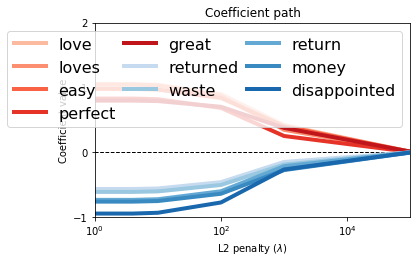

In [28]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

#### Question 5

Questions 5 and 6 use the coefficient plot of the words in positive_words and negative_words.

(True/False) The relative order of coefficients is preserved as the L2 penalty is increased. (For example, if the coefficient for 'cat' was more positive than that for 'dog', this remains true as the L2 penalty increases.)

__Ans__: False

#### Question 6
Questions 7, 8, and 9 ask you about the 6 models trained with different L2 penalties.
Which of the following models has the highest accuracy on the training data?

__Ans__: Model trained with L2 penalty = 0

In [30]:
def get_classification_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    apply_threshold = np.vectorize(lambda x: 1. if x > 0  else -1.)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)    
    return accuracy

In [31]:
train_accuracy = {}
train_accuracy[0]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_0_penalty)
train_accuracy[4]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_4_penalty)
train_accuracy[10]  = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_10_penalty)
train_accuracy[1e2] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e2_penalty)
train_accuracy[1e3] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e3_penalty)
train_accuracy[1e5] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e5_penalty)

validation_accuracy = {}
validation_accuracy[0]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_0_penalty)
validation_accuracy[4]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_4_penalty)
validation_accuracy[10]  = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_10_penalty)
validation_accuracy[1e2] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e2_penalty)
validation_accuracy[1e3] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e3_penalty)
validation_accuracy[1e5] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e5_penalty)

In [32]:
# Build a simple report
for key in sorted(validation_accuracy.keys()):
    print ("L2 penalty = %g" % key)
    print ("train accuracy = %s, validation_accuracy = %s" % (train_accuracy[key], validation_accuracy[key]))
    print ("--------------------------------------------------------------------------------")

L2 penalty = 0
train accuracy = 21178.570666414864, validation_accuracy = 5356.177947904024
--------------------------------------------------------------------------------
L2 penalty = 4
train accuracy = 21178.570666414864, validation_accuracy = 5356.182335916347
--------------------------------------------------------------------------------
L2 penalty = 10
train accuracy = 21178.567526734496, validation_accuracy = 5356.191111940995
--------------------------------------------------------------------------------
L2 penalty = 100
train accuracy = 21178.501593446803, validation_accuracy = 5356.213052002614
--------------------------------------------------------------------------------
L2 penalty = 1000
train accuracy = 21180.561223767145, validation_accuracy = 5355.168705069555
--------------------------------------------------------------------------------
L2 penalty = 100000
train accuracy = 21209.42430537523, validation_accuracy = 5344.940248342825
---------------------------------

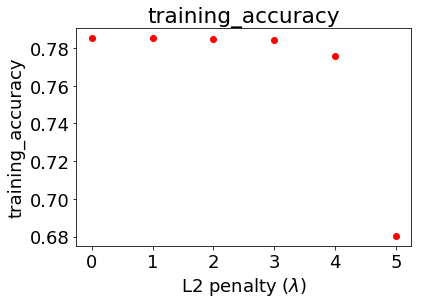

In [33]:
#plot accuracy
training_accuracy = []
for coefficient in [coefficients_0_penalty, coefficients_4_penalty, coefficients_10_penalty, coefficients_1e2_penalty, coefficients_1e3_penalty, coefficients_1e5_penalty]:
    predictions = predict_probability(feature_matrix_train, coefficient)
    correct = np.sum((np.transpose(predictions.flatten())> 0.5) == (np.array(sentiment_train)>0))
    total = len(sentiment_train)
    training_accuracy.append(correct * 1./ total)
l2_penalty_list=[x for x in range(6)]
plt.plot(l2_penalty_list, training_accuracy,'ro')
plt.title('training_accuracy')
plt.xlabel('L2 penalty ($\lambda$)')
plt.ylabel('training_accuracy')
plt.show()

In [34]:
pd.DataFrame({"l2_penalty":l2_penalty_list,"training_accuracy":training_accuracy})

,l2_penalty,training_accuracy
0,0,0.785156
1,1,0.785109
2,2,0.784991
3,3,0.783976
4,4,0.775855
5,5,0.680366


#### Question 7

Questions 7, 8, and 9 ask you about the 6 models trained with different L2 penalties.

Which of the following models has the highest accuracy on the validation data?

__Ans__: Model trained with L2 penalty = 10

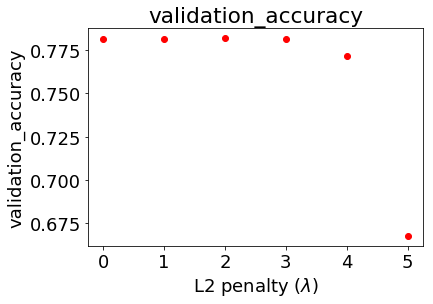

In [35]:
validation_accuracy = []
for coefficient in [coefficients_0_penalty, coefficients_4_penalty, coefficients_10_penalty, coefficients_1e2_penalty, coefficients_1e3_penalty, coefficients_1e5_penalty]:
    predictions = predict_probability(feature_matrix_valid, coefficient)  
    correct = np.sum((np.transpose(predictions.flatten())> 0.5) == (np.array(sentiment_valid)>0))
    total = len(sentiment_valid)
    validation_accuracy.append(correct * 1./ total)
l2_penalty_list=[x for x in range(6)]
plt.plot(l2_penalty_list, validation_accuracy,'ro')
plt.title('validation_accuracy')
plt.xlabel('L2 penalty ($\lambda$)')
plt.ylabel('validation_accuracy')
plt.show()                  

In [36]:
pd.DataFrame({"l2_penalty":l2_penalty_list,"validation_accuracy":validation_accuracy})

,l2_penalty,validation_accuracy
0,0,0.781440
1,1,0.781533
2,2,0.781720
3,3,0.781066
4,4,0.771357
5,5,0.667818


#### Question 8

Questions 7, 8, and 9 ask you about the 6 models trained with different L2 penalties.            
Does the highest accuracy on the training data imply that the model is the best one?

__Ans__: No